<a href="https://colab.research.google.com/github/thomasdhille/bankruptcy_death/blob/main/Fs_Investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2

After three months of arduous work, 100 interns at the FullStack Inc are anxious to find out
whether they will be invited to return the next summer. To their surprise, the manager in charge
of the program has left the offer/rejection letters on his/her desk before going out for lunch. Not
wanting to wait for another week and crossing the ethical boundaries, the interns decide to
sneak a peek.

There are 100 envelopes containing 100 letters. Each envelope prints the name of an intern, as
is the letter inside the envelope. It is possible that the two names may not match. The manager
simply put each letter in an arbitrary envelope. There are no identical names.

While one could eventually find his/her own letter after sifting through all 100 envelopes, there is
not enough time as the manager may return from lunch any minute.
The interns have agreed among themselves that each person is allowed to read at most 50
letters. Each person will open an envelope, check the name on the letter, put it back, pick
another envelope and so on. But as competitors against each other, no one is willing to share
any information.

What is the best strategy if you are among the morally compromised interns? If each person
follows the strategy, the chance that everybody finding his/her own letter can be higher than
30%. The group discuss the strategy beforehand, but once the envelopes are open, no one will
be speaking.

Question: What would be the “optimal” strategy?
Notes:

1. Each intern is allowed to check the envelops one-by-one only and must put the decision
letter back to the envelop afterwards. Everything must be in the exact same condition as
before when the intern is finished. Then the next intern can start to check.
2. Absolutely no communication. The interns are allowed to discuss beforehand and agree
upon an "optimal" strategy. But once anyone started to open the envelops, nobody talks
to anyone else.

## Notation

1. Let $(\Omega, \mathcal A, \mathbb P)$ be a probability space with state space $\Omega$, $\sigma$-algebra $\mathcal A$ and normed measure $\mathbb P$. 
  - A __random variable__ is a measurable map $X : \Omega \to \mathbb R$ (or into some naturally measurable space) throughout the discussion of this problem it will be convenient to write $\omega \mapsto X_\omega$.
  - The __distribution__ of a random variable $X: \Omega \to \mathbb R$ is the push-forward $X_* \mathbb P$ of $\mathbb P$ under $X$, i.e. the probability measure on $\mathbb R$ defined by $X_* \mathbb P(B) = \mathbb P(X^{-1}B)$ for any Borel measurable set $B \in \mathcal B(\mathbb R)$, where $\mathcal B(\mathbb R)$ denotes the Borel $\sigma$-algebra on $\mathbb R$. 
  - For a family of countably many random variables $(X^{(\lambda)}: \Omega \to \mathbb R)_{\lambda \in \Lambda}$ we denote by $\sigma((X^{(\lambda)})_{\lambda \in \Lambda})$ the smallest sub-$\sigma$-algebra for which all $(X^{(\lambda)})_{\lambda \in \Lambda}$ are measurable.
  - For a random variable $X : \Omega \to \mathbb R$ we write $\mathbb E(X) = \int_{\Omega} X_\omega \, \text{d} \mathbb P(\omega)$ and think of $\mathbb E(\, \cdot \,)$ here as a functional on $L^2(\Omega, \mathcal A, \mathbb P)$.
  - Given a sub-$\sigma$-algebra $\mathcal F$, we write $\mathbb E( \, \cdot \, | \, \mathcal F)$ for the conditional expectation operator induced by $\mathcal F$, for this purpose simply the orthogonal projection of $L^2(\Omega, \mathcal A, \mathbb P)$ onto $L^2(\Omega, \mathcal F, \mathbb P)$.
  - A (discrete $\mathbb N$-indexed) __filtration__ in $\mathcal A$ is a family $\mathbb F = (\mathcal F_n)_{n \in \mathbb N}$ consisting of an increasing sequence $\mathcal F_1 \subseteq \mathcal F_2 \subseteq \dots  $ of sub-$\sigma$-algebras of $\mathcal A$.
  - A (discrete $\mathbb N$-indexed) __stochastic process__ is a family $(X^{(n)})_{n \in \mathbb N}$ of random variables. 
  - Given a filtration $\mathbb F=(\mathcal F_n)_{n \in \mathbb N}$, we say that a stochastic process is __$\mathbb F$-measurable__ if $X_n$ is $\mathcal F_n$-measurable for each $n$.

2. Set notation:
  - For a set $A$ we denote by $\# A$ the cardinality of $A$
  - For a family of sets $(A_\lambda)_{\lambda \in \Lambda}$ we write $\bigcup_{\lambda \in \Lambda} A_\lambda$ for its __union__, $\bigcap_{\lambda \in \Lambda} A_\lambda$ for its __intersection__ and write $\bigsqcup_{\lambda\in\Lambda} A_\lambda$ for the union if the sets are disjoint.
  - For a subset $A$ of an ambient space $B$ we write $A^c = B/A$ for its complement inside of $B$.
  - For a discrete and finite set $A$ we write $\text{Sym}(A)$ for the symmetric group on $A$ (i.e. the group of automorphisms of $A$)

## Preliminary Setup

Let $N \in \mathbb N$, which in this case we think of as $N=100$. We denote by $\text{Sym}(N)$ the symmetric group on the set $\{1,\dots, N\}$ and we interpret this latter set as the set of all interns. Given a permutation $\sigma \in \text{Sym}(N)$ and $1 \leq i \leq N$ we write $\sigma \cdot i$ for the action of $\sigma$ on $i$ (i.e. the permutation of $i$ under $\sigma$). 

Moreover, we fix a probability space $(\Omega, \mathcal A, \mathbb P)$ together with a random variable $\kappa: \Omega \to \text{Sym}(N)$, which represents the random placement of the letters inside the envelopes. We will later simply require $\kappa$ to be uniformly distributed or equivalently $\mu_\kappa  = \kappa_* \mathbb P = \frac{1}{N!}\sum_{\sigma \in \text{Sym}(N)}\delta_\sigma$ to be the uniform distribution on $\text{Sym}(N)$.


## Definition of an Admissible Strategy

Next, we need to define the notion of an admissible strategy, that is, we need  to characterize the strategies that the interns are allowed to pursue:

1. __(AS1)__ An __individual strategy (of length $l$ for intern $i$)__ is a stochastic process $S = (s^{(1)},\dots, s^{(l)})$ that is measurable with respect to a filtration $\mathbb F_S = (\mathcal F_1 \subseteq \dots \subseteq F_l)$ characterized by
  - $\mathcal F_1$ is independent of  $\kappa$, 
  - $\mathcal F_2 = \sigma(\kappa \cdot s^{(1)}, \mathcal F_1)$, 
  - $\mathcal F_3 = \sigma(\kappa \cdot s^{(1)},\kappa \cdot s^{(2)},\mathcal F_1)$
  - $\vdots$
  - $\mathcal F_l = \sigma(\kappa \cdot s^{(1)}, \dots, \kappa \cdot s^{(l-1)},\mathcal F_1)$
  
  The interpretation in terms of the problem is as follows: for a realization $\omega \in \Omega$, the intern with strategy $S$ opens the envelops marked $s^{(1)}_\omega,\dots, s^{(l)}_\omega$ in that order. The names printed inside these envelops are accordingly $\kappa_\omega \cdot s^{(1)}_\omega,\dots,\kappa_\omega \cdot s^{(l)}_\omega$ and intern $i$ is successful if $\kappa_\omega \cdot s^{(j)}_\omega = i$ for some $1 \leq j \leq l$.

  The measurability conditions are a bit more technical technical:
    - The condition that $\mathcal F_1$ is independent of $\kappa$ reflects the fact that the $i$-th intern has no information regarding $\kappa$. 
    - For any $2 \leq j \leq l-1$, the condition that $s^{(j)}$ is $ \sigma(\kappa \cdot s^{(1)}, \dots, \kappa \cdot s^{(j-1)},\mathcal F_1)$-measurable models the $i$-th intern's ability to access not only the information available at the beginning, but also the information gathered throughout the course of opening the first $j-1$ envelopes.
 

2. __(AS2)__ An __admissible strategy__ is a family $\vec S= (S_1, \dots, S_N)$ of individual strategies in the sense of (AS1) and we denote the set of all admissible strategies by $\Theta_{\text{adm}}$.

3. __(AS3)__ Given an individual strategy $S= (s^{(1)},\dots, s^{(l)})$ for intern $i$, we denote by
$$
\text{Success}(S) = \big \{ \kappa \cdot s^{(j)} = i \text{ for some } 1 \leq j \leq l \big \} \subseteq \Omega,
$$
the __set of individual success__ of the individual strategy $S$. Its complement is denoted by
$$
\text{Fail}(S) = \text{Success}(S)^c
$$
and referred to as the __set of individual failure__ of the individual strategy $S$.
Moreover, we call $\mathbb P(\text{Success}(S))$ the __probabilty of individual success__ of the individual strategy $S$ and $\mathbb P(\text{Fail}(S))$ the __probability of individual failure__ of the individual strategy $S$.

4. __(AS4)__ Given an admissible strategy $\vec S = (S_1,\dots, S_N)$ we call the set
$$
\text{Success}(\vec S) = \bigcap_{1 \leq i \leq N} \text{Success}(S_i),
$$
the __set of collective success__ of the strategy $\vec S$. Correspondingly, we call its complement
$$
\text{Fail}(\vec S) = \bigcup_{1 \leq i \leq N} \text{Fail}(S_i),
$$
the __set of collective failure__ of the strategy $\vec S$. Moreover, we call $\mathbb P(\text{Success}(\vec S))$ the __probability of collective success__ of strategy $\vec S$ and $\mathbb P(\text{Failure}(\vec S))$ the __probability of collective failure__ of strategy $\vec S$.



## Random Walk Strategy

Incidentally, (AS1) already suggests a winning admissible strategy when $l$ is large enough. Namely, for any $1 \leq i \leq N$, we let intern $i$ follow the random walk defined by
\begin{align*}
& s_i^{(1)}=i, \\
& s_i^{(2)} = \kappa \cdot s^{(1)}, \\
& s_i^{(3)} = \kappa \cdot s^{(2)}, \\
&\vdots \\
& s_i^{(l)} = \kappa \cdot s^{(l-1)}.
\end{align*} 
Then, $S_i = (s_i^{(1)},\dots, s_i^{(l-1)})$ is an individual strategy for intern $i$ in the sense of (AS1) and unless $\kappa$ is disproportionately supported on the set of permutations whose orbit under $i$ is longer than $l$, the success of this strategy will not be negligible. Let us be more precise: for any $\sigma \in \text{Sym}(N)$, the (semi-)orbit $\sigma^{\mathbb N_0} \cdot i = \{ \sigma^{n} \cdot i \, | \, n \in \mathbb N_0 \}$ is finite (as $N < \infty$) and thus the random walk underlying the above-mentioned strategy $S_i$ is recurrent (i.e. returns eventually to its initial state with probability $1$). The main caveat here is that $l < N$ and the orbit $\sigma ^{\mathbb N_0} \cdot i$ (usually referred to in the context of the symmetric group as the cyclic component of $\sigma$ containing $i$) might be longer than $l$. Thus, it follows from this discussion, that the set of individual failure of strategy $S_i$ is given by
$$
\text{Fail}(S_i) = \big \{  \# (\kappa^{\mathbb N_0} \cdot i) \geq l+1 \big \}.
$$

Let $\vec S = (S_1,\dots, S_N)$, then the set of collective failure of this strategy is precisely
$$
\text{Fail}(\vec S) = \bigcup_{i=1} ^N \text{Fail}(S_i) = \big \{ \# (\kappa^{\mathbb N_0} \cdot i) \geq l+1 \text{ for some } 1 \leq i \leq N \big \}.
$$

__Lemma (Random Walk Strategy):__ Assume that $N$ is even, $l = N/2$ and that $\kappa$ is uniformly distributed. Then,
\begin{align*}
\mathbb P(\text{Success}(\vec S)) = 1- \sum_{n=1}^{N/2} \frac{1}{N/2+n},
\end{align*}
where $\vec S$ is the random walk strategy described above and we can estimate this sum as 
\begin{align*}
1- \log(2)  \leq \mathbb P(\text{Success}(\vec S)) \leq 1-\log(2)\big(1-\frac{2}{N}\big).
\end{align*}
In other words, if the team decides to follow the random walk strategy, they will succeed collectively at least with probability $1- \log(2) \approx 0.3068$ independendently of $N$ and at most with probability $1-\log(2)\big(1-\frac{2}{N})$ for any given $N$. In particular, for $N= 100$, the team will succeed with probability $\mathbb P(\text{Success}(\vec S)) \approx 0.3118278206898051$ using the following simple Python function:

```python
def P_success(N):
    # assert N is even
    if N % 2 != 0:
      raise ValueError('N must be even')

    # initialize the summation and half of N
    summation = 0
    M = N//2

    # compute the probability of failure
    for n in range(1, M + 1):
        summation +=  1/(M+ n)

    # return probability of success
    return 1-summation

P_success(100) --- 0.3118278206898051
```

_Proof:_
<blockquote>
<p>
We start with the key point established above, namely that
$$
\kappa(\text{Fail}(\vec S)) = \bigsqcup_{n=N/2+1}^N\bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \# (\sigma^{\mathbb N_0} \cdot i) = n \text{ for some } 1 \leq i \leq N \bigg \},
$$ 
where the union is disjoint, as any one permutation of degree $N$ admits at most one cyclic component of length strictly greater than $N/2$. We claim that
  $$
  \# \bigg(\bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \# (\sigma^{\mathbb N_0} \cdot i) = n \text{ for some } 1 \leq i \leq N \bigg \} \bigg) = \frac{N!}{n}, \text{ for any } \frac{N}{2}+1 \leq n \leq N.
  $$
  Indeed, let $\frac{N}{2}+1 \leq n \leq N$. The set of all permutations $\sigma \in \text{Sym}(N)$ such that $\# (\sigma^{\mathbb N_0} \cdot i) = n \text{ for some } 1 \leq i \leq N$ stands in bijective correspondence with the set of permutations uniquely represented (in cyclic notation) in the form $(k_1 \beta(k_2) \dots \beta(k_n)) \cdot \tilde \sigma$, where 
  \begin{align*}& 1 \leq k_1 < \dots < k_n \leq N, \\ 
  & \beta \in \text{Sym}(\{ k_2,\dots, k_n\}) \text{ and} \\ 
  & \tilde \sigma \in \text{Sym}(\{1,\dots, N\} \setminus \{k_1,\dots, k_n\}),
  \end{align*}
  from which we simply deduce that the cardinality of this set is 
  $$
  \binom{N}{n} (n-1)! (N-n)! = \frac{N!}{n}.
  $$
  Therefore, as $\kappa$ is uniformly distributed,
  \begin{align*}
\mathbb P(\text{Fail}(\vec S)) = \sum_{n = N/2}^N \frac{1}{n} = \sum_{n=1} ^{N/2} \frac{1}{N/2} \frac{1}{1+\frac{2}{N}n}
  \end{align*}
  Moreover, 
  \begin{align*}
  0 & \leq  \sum_{n=1} ^{N/2} \int_{\frac{2}{N}(n-1)} ^{\frac{2}{N}n} \bigg(\frac{1}{1+x} - \frac{1}{1+\frac{2}{N}n} \bigg) \text{d}x  = \sum_{n=1} ^{N/2} \int_{\frac{2}{N}(n-1)} ^{\frac{2}{N}n} 
  \frac{\frac{2}{N}n - x}{(1+\frac{2}{N}n)(1+x)} \text{d}x
  \\ &
  \leq \frac{2}{N} \sum_{n=1} ^{N/2}  \int_{\frac{2}{N}(n-1)} ^{\frac{2}{N}n} \frac{\text{d}x}{1+x}
  = \frac{2}{N} \sum_{n=1} ^{N/2}  \bigg( \log \big(1+\frac{2}{N}n \big) - \log \big(1+ \frac{2}{N}(n-1)\big) \bigg)
  \\ &
  = \frac{2}{N} \log(2)
  \end{align*}
  Consequently, $\log(2)\big(1-\frac{2}{N}\big) \leq \mathbb P(\text{Fail}) \leq \log(2)$
  or equivalently $1- \log(2)  \leq \mathbb P(\text{Success}) \leq 1-\log(2)\big(1-\frac{2}{N}\big)$.
$\square$
</p>
</blockquote>

As an aside, note that the individual strategies are not independent, e.g. if $\kappa$ is uniformly distributed, then
\begin{align*}
\mathbb P( s_1^{(2)}= 1 \text{ and } s_2^{(2)} = 1) = 0,
\end{align*}
but clearly $\mathbb P( s_1^{(2)}= 1), \mathbb P( s_2^{(2)} = 1) \neq 0$.

Let us also mention why this strategy is noteworthy: suppose that every intern went through the envelopes randomly and independently from the other interns. The individual probability of success under this strategy is clearly $1/2$. However, due to independence, the collective probabililty of success would fall to a dismal $1/2^N$. On the other hand, the random walk strategy gives the same individual success probability of $1/2$ as shown below, but the collective success does not vanish as $N \to \infty$. 

__Lemma (Individual Random Walk Strategy):__ Assume that $N$ is even, $l = N/2$ and that $\kappa$ is uniformly distributed. Then,
\begin{align*}
\mathbb P(\text{Fail}(S_i)) = \mathbb P(\text{Success}(S_i)) = \frac{1}{2},
\end{align*}
where $S_i$ is the individual random walk strategy for intern $i$.

_Proof:_
<blockquote>
<p>
Note that 
\begin{align*}
\mathbb P(\text{Fail}(S_i)) = \frac{1}{N!} \# \bigg ( \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \#(\sigma^{\mathbb N_0} \cdot i) \geq l+1 \bigg \} \bigg)
\end{align*}
The set in the right-hand side of the previous equation is simply
\begin{align*}
\bigsqcup_{n= N/2+1} ^N \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \#(\sigma^{\mathbb N_0} \cdot i ) = n \bigg \}
\end{align*}
and the union is disjoint as no two cyclic components can be of length larger than $N/2+1$. The permutations of the form $\sigma \in \text{Sym}(N)$ such that $\#(\sigma^{\mathbb N_0} \cdot i) = n$ are in bijection with the set of permutations characterized in cyclic notation by
\begin{align*}
& \sigma = (i \beta(k_1) \cdots \beta(k_{n-1})) \cdot \tilde \sigma, \text{ where } \\
& 1 \leq k_1 < \dots < k_{n-1} \leq N, \text{ and } k_s \neq i \text{ for all } 1 \leq s \leq n-1, \\
& \beta \in \text{Sym}(\{k_1,\dots, k_{n-1}\}) \\
& \tilde \sigma \in \text{Sym}(\{1,\dots,N \} \setminus \{i,k_1,\dots,k_{n-1}\}) 
\end{align*}
from which we deduce that
\begin{align*}
\# \bigg( \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \#(\sigma^{\mathbb N_0} \cdot i ) = n \bigg \} \bigg) = \binom{N-1}{n-1}(n-1)!(N-n)! = (N-1)!
\end{align*}
Thus,
\begin{align*}
\mathbb P(\text{Fail}(S_i)) = \sum_{n= N/2+1}^{N} \frac{1}{N} = \frac{1}{2}.
\end{align*}
</blockquote>
</p>
 

## The Optimization Problem

We assume that $\kappa$ is uniformly distributed. The goal is to find an admissible strategy $\vec S_{\text{opt}}$ such that
\begin{align*}
\mathbb P(\text{Success}(\vec S_{\text{opt}})) = \sup_{\vec S \in \Theta_{\text{adm}}} \mathbb P(\text{Success}(\vec S)),
\end{align*}
where $\Theta_{\text{adm}}$ denotes the set of all admissible strategies (AS2). We established in the previous section the following lower bound
$$
\sup_{\vec S \in \Theta_{\text{adm}}} \mathbb P(\text{Success}(\vec S))\geq \mathbb P(\text{Success}(\vec S_{\text{rw}})) \geq 1 - \log(2),
$$
where $\vec S_{\text{rw}}$ is the random walk strategy described in the previous section. 

__Lemma (Random Walk with Random Initiation):__ Assume that $N$ is even, $l = N/2$, for each $1 \leq i \leq N$ let $s_i^{(1)}$ be a random variable independent of $\kappa$ and define $S_i = (s_i^{(1)},\kappa \cdot s_i^{(1)},\dots, \kappa^{N/2} \cdot s_i^{(1)})$. Assume furthermore, that $\mathbb P( s_i^{(1)} = s_j^{(1)} \text{ for some } 1 \leq i < j \leq N) = 0$. Then, $\vec S = (S_1, \dots, S_N)$ is an admissible strategy and 
$$
\mathbb P(\text{Success}(\vec S)) = \mathbb P(\text{Success}(\vec S_{\text{rw}})),
$$
where $\vec S_{\text{rw}}$ is is the random walk strategy described in the previous section. 

Concretely, such a strategy is equivalent to the choice of a random $\text{Sym}(N)$-valued variable $s: \Omega \to \text{Sym}(N)$ that is independent from $\kappa$ and where we set $s_i^{(1)} = s \cdot i$ for each $1 \leq i \leq N$. Note that the random walk strategy constructed in the previous section is in this context simply the case where $s_*\mathbb P = \delta_{\text{id}}$, i.e. $\mathbb P(s = \text{id}) = 1$.

In other words, a consequence of this Lemma is that even if the interns decide to follow the random walk strategy with a random initiation, the probability of collective success still coincides with that of the original random walk. 

_Proof:_ 
<blockquote>
<p>
For any $1 \leq i \leq N$ and $1 \leq j\leq N$ let us set 

$$
S_i(j) = (j, \kappa \cdot j,\dots, \kappa^{l-1} \cdot j)
$$ 

and for any $1 \leq j_1, \dots, j_l \leq N$ set 

$$
\vec S(j_1,\dots, j_N) = (S_1(j_1),\dots, S_N(j_N)).
$$ 

Recall that according to the definition of an admissible strategy, all $s_1^{(1)},\dots, s_N^{(1)}$ are independent of $\kappa$ and $(S_1(j_1),\dots, S_N(j_N))$ is $\sigma(\kappa)$-measurable for each $1 \leq j_1, \dots, j_N \leq N$. Thus, it is a straightforward calculation to establish

\begin{align*}
\mathbb P(\text{Fail}(\vec S)) = \sum_{1 \leq j_1 \leq N} \dots \sum_{1 \leq j_N \leq N} \mathbb P(\text{Fail}(\vec S(j_1,\dots, j_N))) \mathbb P(s_1^{(1)}=j_1,\dots, s_N^{(1)} = j_N).
\end{align*}

In the case that $(j_1,\dots, j_N) = (1,\dots, N)$ it is clear that 

$$
 \mathbb P(\text{Fail}(\vec S(1,\dots, N))) = \mathbb P(\text{Fail}(\vec S_{\text{rw}})).
$$

Hence, let $(j_1,\dots, j_N) \neq (1,\dots, N)$. Note that due to the condition that $\mathbb P( s_i^{(1)} = s_j^{(1)} \text{ for some } 1 \leq i < j \leq N) = 0$ we may assume that $\{j_1,\dots, j_N\}$ is a permutation of the set $\{1,\dots, N\}$ and thus we can choose the permutation $\sigma_{j_1\dots j_N} \in \text{Sym}(N)$ satisfying $\sigma_{j_1\dots j_N} \cdot i = j_i$ for each $1 \leq i \leq N$. In analogy to the discussion above, $\text{Fail}(\vec S(j_1,\dots,j_N))$ is simply the inverse image under $\kappa$ of the set 
\begin{align*}
\bigsqcup_{n=N/2+1} ^N \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \# (\sigma^{\mathbb N_0} \cdot \sigma_{j_1\dots j_n} \cdot i) = n \text{ for some } 1 \leq i \leq N \bigg \},
\end{align*}
which, due to the transitivity underlying this particular permuting action, is simply 
\begin{align*}
\bigsqcup_{n=N/2+1} ^N \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \# (\sigma^{\mathbb N_0} \cdot i) = n \text{ for some } 1 \leq i \leq N \bigg \},
\end{align*}
and we already computed in the previous section this set to be of cardinality 
\begin{align*}
N!\sum_{n=N/2+1} ^{N} \frac{1}{n}.
\end{align*}
Thus, in measure, we conclude that
$$
 \mathbb P(\text{Fail}(\vec S(j_1,\dots, j_N))) = \mathbb P(\text{Fail}(\vec S_{\text{rw}})).
$$
The claim follows now from the fact that 
$$
\sum_{1 \leq j_1 \leq N} \dots \sum_{1 \leq j_N \leq N}  \mathbb P(s_1^{(1)}=j_1,\dots, s_N^{(1)} = j_N) = 1.
$$
</p>
</blockquote>

__Lemma (Individual Strategies without Redundant Returns):__ Suppose $S = (s^{(1)},\dots, s^{(l)})$ is an individual strategy. There is an individual strategy $\widetilde S = (\tilde s^{(1)},\dots, \tilde s^{(l)})$ such that $\text{Success}(\widetilde S) \supseteq \text{Success}(S)$ and such that $\mathbb P(\tilde s^{(j)} =\tilde s^{(k)} \text{ for some }1 \leq k <  j \leq l ) = 0$.

We call an individual strategy $S$ such that $\mathbb P(s^{(j)} =s^{(k)} \text{ for some }1 \leq k <  j \leq l ) = 0$ an __individual strategy (for intern $i$) without redundant returns__. In other words (albeit intuitively clear), there is no gain in terms of individual success in revisiting envelopes that had already been opened.

_Proof:_
<blockquote>
<p>
We may assume that $\mathbb P(\tilde s^{(j)} =\tilde s^{(k)} \text{ for some }1 \leq k <  j \leq l ) \neq 0$, for otherwise we can take $\widetilde S = S$.
We will construct the new strategy from $S$ using an inductive procedure. 

In a first instance, for each $2 \leq j \leq l$ we redefine $s^{(j)}$ by taking $\tilde s^{(j)}_\omega \in \{1,\dots, N\} \setminus \{ s_\omega ^{(1)}\}$ for $\omega \in \{ s^{(j)} = s^{(1)} \}$  and setting $\tilde s^{(j)} = s^{(j)}$ otherwise. The new strategy $\widetilde S = (s^{(1)},\tilde s^{(2)},\dots, \tilde s^{(l)})$ is an individual strategy as defined in (AS1), $\mathbb P(\tilde s^{(j)} = s^{(1)} \text{ for some } 2 \leq j \leq N \} =0$ and $\text{Success}(\widetilde S) \supseteq \text{Success}(S)$ (as under the new strategy, intern $i$ does not go back to an envelop already opened during the first step). 

Assume next that $S$ is a strategy for which $\mathbb P(s^{(j)} = s^{(1)} \text{ for some } 2 \leq j \leq N \} =0$ but otherwise $\mathbb P(\tilde s^{(j)} =\tilde s^{(k)} \text{ for some }1 \leq k <  j \leq l ) \neq 0$. For each $3 \leq j \leq l$ we redefine $s^{(j)}$ on $\{s^{(j)} = s^{(2)}\}$ as follows: for $\omega \in \{s^{(j)} = s^{(2)}\}$ we choose $\tilde s_\omega^{(j)} \in \{1,\dots, N\} \setminus \{s^{(1)}_\omega,s^{(2)}_\omega\}$ and leave it otherwise untouched.  As before, it follows that new strategy $\widetilde S = (s^{(1)}, s^{(2)}, \tilde s^{(3)},\dots, \tilde s^{(l)})$ is an individual strategy as defined in (AS1), $\mathbb P(\tilde s^{(j)} = s^{(k)} \text{ for some } 1 \leq k \leq 2 \text{ and } k < j \leq N  \} =0$ and $\text{Success}(\widetilde S) \supseteq \text{Success}(S)$.

We simply repeat this procedure until we have constructed the desired strategy.
$\square$
</p>
</blockquote>


__Lemma:__ Suppose $\vec S = (S_1,\dots, S_N)$ is an admissible strategy without redundant returns such that in the $i$-th individual strategy $S_i = (s_i^{(1)},\dots, s_i^{(l)})$ every random variable $s_i^{(j)}$ is independent of any envelope opened before. Then, $\vec S$ is suboptimal.

_Proof:_
<blockquote>
<p>
Without loss of generality assume that $i =1$. The fact that in the individual strategy $S_1 = (s_1^{(1)},\dots, s_1^{(l)})$, the random variables $s_i^{(1)}$ are independent of the envelopes opened before means that each random variable $s_1^{(i)}$ is $\sigma(\mathcal F_1)$-measurable (i.e. independent of $\kappa$ in the notation of (AS1)). 
Before proceeding let us make the observation that $\kappa \cdot s$ is automatically uniformly distributed on $\{1,\dots, N\}$ whenever $s$ is any $\{1,\dots, N\}$-valued random variable independent of $\kappa$. Indeed, for any $1 \leq n \leq N$ we have
\begin{align*}
\mathbb P(\kappa \cdot s = n) &= \sum_{j=1} ^N \mathbb P(\kappa \cdot j = n \, | \, s = j) \mathbb P(s = j) \\ &
= \sum_{j=1} ^N \mathbb P(\kappa \cdot j = n) \mathbb P(s = j) \\ 
& = \frac{1}{N!} \sum_{j=1} ^N \mathbb \sum_{\sigma \in \text{Sym}(N)} \# \bigg( \bigg \{ \sigma \in \text{Sym}(N) \, \bigg | \, \sigma \cdot j = n \bigg \}\bigg ) \, \mathbb P(s = j)  = \frac{1}{N}, 
\end{align*}
where we use that $\{ \sigma \in \text{Sym}(N) \,  | \, \sigma \cdot j = n  \} \simeq \text{Sym}(N-1)$.


\begin{align*}
\mathbb P(\text{Success}(\vec S)) = \mathbb P \big (\text{Success}(\vec S) \, \big | \, \kappa \cdot s_1^{(i)} = 1 \text{ for some } 1 \leq i \leq l  \big ) \, \mathbb P(\kappa \cdot s_1^{(i)} = 1 \text{ for some } 1 \leq i \leq l).
\end{align*}
Let us thus compute $\mathbb P \big (\bigcup_{i=1} ^{l}\{ \kappa \cdot s_1^{(i)} = 1\} \big)$. It is easy to see that 
\begin{align*}
\mathbb P \bigg (\bigcup_{i=1} ^{l}\{ \kappa \cdot s_1^{(i)} = 1\} \bigg) = \mathbb P(\kappa \cdot s_1 ^{(1)}=1)\mathbb P(\kappa \cdot s_1 ^{(2)}=1| \kappa \cdot s_1 ^{(1)}\neq 1) \dots \mathbb P(\kappa \cdot s_1 ^{(l)}=1| \kappa \cdot s_1 ^{(1)},\dots,\kappa \cdot s_1^{(l-1)}\neq 1) 
\end{align*}
and according to the abovementioned observation we find
\begin{align*}
\mathbb P(\kappa \cdot s_1 ^{(i)}=1| \kappa \cdot s_1 ^{(1)},\dots, \kappa\cdot s_1^{(i-1)}\neq 1) = \frac{1}{N-i}, \text{ for each } 1 \leq i \leq l.
\end{align*}
It follows that
\begin{align*}
\mathbb P(\text{Success}(\vec S)) \leq 
\end{align*}

The set of summation follows from the assumption that $S_1$ has no redundant returns and the fact that the strategy fails if none of $j_1,\dots, j_l$ are $1$. It is easily seen that any $\{1,\dots, N\}$-valued random variable $X$ that is independent from $\kappa$ is automatically uniformly distributed on $\{1,\dots, N\}$. Indeed, 

Now, due to independence, we have
\begin{align*}
\mathbb P(S_1 = (j_1,\dots, j_l)) = \prod_{i=1} ^{l} \mathbb P(s^{(i)}_1 = j_i).
\end{align*}

</p>
</blockquote>


__Lemma:__ Let $S= (s^{(1)},\dots, s^{(l)})$ be an individual strategy without redundant returns and assume that $s^{(j)}$ is independent of $s^{(1)},\dots, s^{(j-1)}$ for some $2 \leq j \leq l$. There is a strategy $\widetilde S$ 

## Definition of the Success of an Admissible Strategy

As before, we define this in stages:

1. __(V1)__ Let $S = (s^{(1)},\dots, s^{(l)})$ be an individual strategy for intern $i$ with $l \leq N/2$ (see (AS1) above). We define the __individual success of intern $i$__ for $S$ to be the random variable
$$
V_{\text{ind}}(S,i) = \sum_{j = 1} ^{\tau_i \wedge l } \delta_{s^{(j)}}(\kappa ^{-1} \cdot i),
$$
where $\tau_i$ is the stopping time $\tau_i = \inf \{1 \leq j \leq l \, | \, s^{(j)}=i \}$, so
$$
V_{\text{ind}}(S,i)_\omega = \sum_{j = 1} ^{\tau_i(\omega)\wedge l} \delta_{s^{(j)}_\omega}(\kappa_\omega ^{-1} \cdot i), \text{ for } \omega \in \Omega.
$$
Note that $V_{\text{ind}}(S,i)_\omega = 1$ if $\kappa_\omega ^{-1} \cdot i = s^{(j)}_\omega$ for some $j$ and is zero otherwise. In other words, $V_{\text{ind}}(S,i)_\omega$ is one if and only if intern $i$ finds the envelope with the letter printed with name $i$ inside.

2. __(V2)__ Let $\vec S = (S_1,\dots, S_N)$ be a strategy (see (AS2) above). We define the __collective success__ of $\vec S$ to be the random variable defined by
$$
V(\vec S) = \prod_{i=1}^{N} V_{\text{ind}}(S_i,i).
$$
Thus, for $\omega \in \Omega$, $V(\vec S)_\omega$ is $1$ if and only if all interns succesfully find the envelope containing the letter with their name printed on it.

## Basic Consequences and Observations

__Observations:__

1. __(Obs1)__ Let $\vec S$ be an admissible strategy. Then,
\begin{align*}
\mathbb E(V(\vec S)) = \prod_{i = 1} ^N \mathbb E(V_{\text{ind}}(S_i,i)).
\end{align*}
This follows directly from (AS2) as all $V_{\text{ind}}(S_1,1),\dots, V_{\text{ind}}(S_N,N)$ are mutually independent.

2. __(Obs2)__ Let $\vec S$ be an admissible strategy. Then, $\mathbb E(V(\vec S) )$ is the probability of all interns succeeding simultaneously. Indeed, let $\vec S$ be an admissible strategy. In (V2) we established that $\Omega$ can be decomposed into the disjoint events $\{ V(\vec S) = 1 \}$ and $\{ V(\vec S) = 0\}$. It follows that
\begin{align*}
\mathbb P(V(\vec S)=1) = \mathbb E( \mathbb 1_{\{V(\vec S)=1\}})= \mathbb E(V(\vec S)\mathbb 1_{\{V(\vec S)=1\}} )= \mathbb E(V(\vec S)).
\end{align*}

3. __(Obs3)__ Let $\mathcal F$ be a partition of $\text{Sym}(N)$ and $S = (s^{(1)},\dots, s^{(l)})$ an individual strategy for intern $i$. Then, 
\begin{align*}
\mathbb E(V_{\text{ind}}(S,i)) = \sum_{F \in \mathcal F} \mathbb E(V_{\text{ind}}(S,i) \, | \, F) \,  \mathbb P(F).
\end{align*}

4. __(Obs4)__ Assume here that $\kappa$ is uniformly distributed. If $S = (s^{(1)},\dots, s^{(l)})$ is an individual strategy for intern $i$ and each $s^{(j)}$ is independent from $\kappa$. Then, 
$$
\mathbb E(V_{\text{ind}}(S,i))  \leq \frac{1}{2}.
$$
Indeed, this is a direct consequence of (Obs3) (with $\mathcal F$ taken to be the discrete partition of $\text{Sym}(N)$, i.e. where every element is a partition element itself), 
\begin{align*}
\mathbb E(V_{\text{ind}}(S,i)) & \leq \sum_{j=1}^l \sum_{k=1} ^N \sum_{\sigma \in \text{Sym}(N)} \mathbb P(s^{(j)}=k) \mathbb P(\kappa = \sigma) \delta_{k}(\sigma^{-1} \cdot i) \\
& = \frac{1}{N! N} \sum_{j=1}^l \sum_{k=1} ^N \# \big \{ \sigma \in \text{Sym}(N) \, \big | \, \sigma \cdot k = i \big \}  \\
& = \frac{l}{N} \leq \frac{1}{2}
\end{align*}
We used the fact that $\# \{ \sigma \in \text{Sym}(N) \, | \,  \sigma \cdot k = i \} = (N-1)!$ (as the former set is isomorphic to $\text{Sym}(N-1)$ as it is the stabilizer of a single element).

5. __(Obs5)__ Assume here that $\kappa$ is uniformly distributed. If $\vec S$ is an admissible strategy for which each individual strategy $S_j$ consists of random variables independent from $\kappa$. Then,
\begin{align*}
\mathbb E(V(\vec S)) \leq \frac{1}{2^N}.
\end{align*}
This is a direct consequence of (V2) and (Obs4).
  
6. __(Obs6)__ Let $S = (s^{(1)},\dots, s^{(l)})$ be an individual strategy with $l < \lfloor(N/2) \rfloor$. Let $s^{(l+1)}$ be any $\{1,\dots,N\}$-value random variable and set $\widetilde S = (s^{(1)},\dots, s^{(l+1)})$. Then,
$$
\mathbb E(V_{\text{ind}}(S,i)) \leq \mathbb E(V_{\text{ind}}(\widetilde S,i)).
$$
In other words (albeit a trivial observation), inserting one more action into an individual strategy does not decrease the individual's success.


## Reduction from the Collective to the Individual Optimization Problem

From now on assume that $\kappa$ is uniformly distributed. As observed in (Obs2), $\mathbb E(V(\vec S) )$ is the probability of the collective success for a given strategy $\vec S$. Let us define the set of admissible strategies
$$
\Theta_{\text{adm}} = \bigg \{ \vec S \, \bigg | \, \vec S \text{ is an admissible strategy} \bigg \}.
$$
The __collective optimization problem__ is the number
$$
\sup_{\vec S \in \Theta_{\text{adm}}} \mathbb E(V(\vec S)),
$$
which can be interpreted as the optimal simultaneous probability of success. Let us make a couple of notes regarding an optimal strategy:

1. __(Opt1)__ Suppose $\vec S = (S_1,\dots, S_N) \in \Theta_{\text{adm}}$ is an optimal strategy. Then, 
\begin{align*}
\mathbb E(V_{\text{ind}}(S_i,i)) = \mathbb E(V_{\text{ind}}(S_j,j)) \; \text{ for all } 1 \leq i < j \leq N. 
\end{align*}
Indeed, suppose $\vec S = (S_1,\dots, S_N) \in \Theta_{\text{adm}}$ were an optimal strategy for which $\mathbb E(V_{\text{ind}}(S_i,i)) < \mathbb E(V_{\text{ind}}(S_j,j))$ for some $1 \leq i < j \leq N$. After possibly permuting the indices, we may assume that 
\begin{align*}
&\mathbb E(V_{\text{ind}}(S_1,1)) \geq \mathbb E(V_{\text{ind}}(S_i,i)) \; \text{ for all } 1 \leq i \leq N, \\
&\mathbb E(V_{\text{ind}}(S_1,1)) > \mathbb E(V_{\text{ind}}(S_{2},2)).
\end{align*}
We now simply require intern $2$ to mimick the strategy of intern $1$. More precisely, we take the transposition $\sigma_{12}=(12) \in \text{Sym}(N)$ switching $1$ and $2$ and define the new strategy of intern $2$ to be $\widetilde S_2 = \sigma_{12} \cdot \widetilde S_1 = (\sigma_{12} \cdot s_1^{(1)},\dots, \sigma_{12} \cdot s_1^{(l_1)})$, where $\widetilde S_1$ is independent and identically distributed copy of $S_1$. Then, 
$\mathbb E(V_{\text{ind}}(\widetilde S_2,2))=\mathbb E(V_{\text{ind}}(S_1,1)) $ as $\kappa$ is the left-invariant Haar measure. However, if we denote by $\widetilde S$ the new strategy updating intern $2$'s strategy to $\widetilde S_2$, this would imply $\mathbb E(V(\widetilde S)) > \mathbb E(V(S))$ and thus a contradiction to the optimality of $S$.


2. __(Opt2)__ An optimal strategy $\vec S$ cannot be independent of $\kappa$. In other words, not taking any cues from the knowledge gained of a realization of $\kappa$ when opening successive envelopes leads to a dismal simultaneous success probability. Indeed, we established in (Obs5) that  $\mathbb E(V(\vec S)) \leq 2^{-N}$ if $\vec S$ is an admissible strategy for which every individual strategy consists of random variables independent of $\kappa$. 

In view of (Opt1), (Opt2) and (Opt6) we introduce
$$
\Theta^{\text{ind}}_{\text{adm}} = \bigg \{ S \, \bigg | \, S \text{ is an admissible individual strategy for intern } 1 \text{ of length } \lfloor N/2 \rfloor \text{  not independent of } \kappa \bigg \}.
$$
It is plain to see that 
$$
\sup_{\vec S \in \Theta_{\text{adm}}} \mathbb E(V(\vec S)) = \sup_{S \in \Theta^{\text{ind}}_{\text{adm}}} \mathbb E(V_{\text{ind}}(S))^N,
$$
where we simply write from now on $V_{\text{ind}}(S)$ instead of $V_{\text{ind}}(S,1)$.
We will refer to the right-hand side of the previous equality as the __individual optimization problem__.
In other words, a collective optimal strategy can be concocted from an individual optimal strategy mimicked by all interns. However, we note that the inverse statement is not obvious and might not be true.


## The Individual Optimization Problem

As stated above, we can now focus on the individual optimization problem  
$$
\sup_{S \in \Theta^{\text{ind}}_{\text{adm}}} \mathbb E(V_{\text{ind}}(S))^N,
$$
where we write $V_{\text{ind}}(S)$ instead of $V_{\text{ind}}(S,1)$. Let $S \in \Theta^{\text{ind}}_{\text{adm}}$ and fix $\sigma \in \text{Sym}(N)$ as well as  $\omega \in \{ \kappa = \sigma \}$. Then,
\begin{align*}
V_{\text{ind}}(S)_\omega = \sum_{i=1}^l \delta_{s_\omega^{(i)}}(\sigma^{-1} \cdot 1).
\end{align*}
The group $\text{Sym}(N)$ acts on $\Theta^{\text{ind}}_{\text{adm}}$ by multiplication and thus it is easy to see that
$$
V_{\text{ind}}(\sigma^{n} \cdot S) = 1
$$
for some large enough $n$ as long as one of $s_\omega^{(1)},\dots, s_\omega^{(l)}$ lies in the semi-orbit $\sigma^{\mathbb N_0} \cdot 1 = \{ \sigma^n \cdot 1 \, | \, n \in \mathbb N_0\}$ of $1$ under $\sigma$. The semi-orbit $\sigma^{\mathbb N_0} \cdot 1$ is usually referred to as the cyclic component of $\sigma$ containing $1$. In particular we observe that
$$
\textbf{ if } \; \; \{s_{\omega^{(1)}},\dots,s_{\omega^{(l)}} \} \cap \sigma^{\mathbb N_0} \cdot 1 = \varnothing \; \;\textbf{ then } \; \; V_{\text{ind}}(S)_\omega = 0
$$
This discussion suggests constructing a strategy $S$ whose values are always on the stochastic semi-orbit $\kappa^{\mathbb N_0} \cdot 1$. Namely

\begin{align*}
&s_\omega ^{(1)} = 1, \\
&s_\omega^{(2)} = \kappa_\omega \cdot 1 \; \; \; \; \,\textbf{ Note: } \text{after opening envelop } 1 \text{ intern } 1 \text{ can see } \kappa_\omega \cdot 1, \\
&\vdots \\
& s_\omega^{(l)} = \kappa_\omega \cdot s_\omega^{(l-1)}
\textbf{ Note: } \text{after opening envelop } s_\omega^{(l-1)} \text{ intern } 1 \text{ can see } \kappa_\omega \cdot s_\omega^{(l-1)}.
\end{align*}

Thus, this strategy can be rewritten as $S = (1,\kappa \cdot 1, \dots, \kappa^{l-1} \cdot 1)$.


As before we assume now that $\kappa$ is uniformly distributed on $\text{Sym}(N)$. An individual strategy $S$ induces a (measurable) decomposition of $\Omega$ as follows





\begin{align*}
& \mathcal F_+(S) = V_{\text{ind}}(S)^{-1}(\{1\}) \\
& \mathcal F_-(S) = V_{\text{ind}}(S)^{-1}(\{0\})
\end{align*}
and it is plain to see that
$$
\mathbb P(\mathcal F_+(S)) = \mathbb E(V_{\text{ind}}(S))
$$
and by definition
$$
\mathbb P(\mathcal F_+(S)) = \frac{1}{N!} \# \big(V_{\text{ind}}(S)^{-1}(\{1\}) \big).
$$

Let $S$ be an individual strategy, in a first instance let us decompose $\mathbb E(V_{\text{ind}}(S))$ with respect to $\kappa$:

$$
\mathbb E(V_{\text{ind}}(S)) = \sum_{\sigma \in \text{Sym}(N)}\mathbb E(V_{\text{ind}}(S) | \kappa = \sigma ) \mathbb P(\sigma = k).
$$
Let $\omega \in \{ \kappa = \sigma \}$ for some $\omega \in \Omega$, then by definition (V1)
$$
V_{\text{ind}}(S)_\omega =  \sum_{i = 1} ^l \delta_{s^{(i)}_\omega}(\sigma ^{-1} \cdot 1)
$$

Thus, an optimal individual strategy $S$ is one that maximizes the cardinality of the set $V_{\text{ind}}(S)^{-1}(\{1\})$.

In order to so, let us decompose $\text{Sym}(N)$ into conjugacy classes. The number of conjugacy classes in $\text{Sym}(N)$ corresponds to the number of partitions of $N$, which we denote for the moment as $p_N$. Let $\sigma_1,\dots, \sigma_{p_N}$ be representatives for each conjugacy class, then
$$
\text{Sym}(N) = \bigsqcup_{1 \leq i \leq p_N} \text{C}_{\text{Sym}(N)}(\sigma_i),
$$
where $\text{C}_{\text{Sym}(N)}(\sigma)$ denotes the centralizer of a permutation $\sigma$ in $\text{Sym}(N)$.

In particular we would like to establish that
$$
\sup_{\vec S \in \mathcal A} V(\vec S) \geq \frac{3}{10}.
$$

## The Cyclic Strategy

Let $1 \leq i \leq N$ and consider the partition $\mathcal F_i = (F_{i,n})_{1 \leq n \leq N}$ of $\text{Sym}(N)$ defined as follows: $F_{i,n}$ is the subset of all $\sigma \in \text{Sym}(N)$ for which the corresponding cycle containing $i$ is of length $n$.

# Question 3

We have two unfair coins. One with a 70% chance of landing on heads (coin #1), and the other
with a 30% chance of landing on heads (coin #2). These two coins are otherwise completely
identical. We will pick a coin at random and flip them an arbitrary number of times. Your task is
to write a program that will help determine which coin it is, based on the experimental results.
The outcomes of the experiment will be a list of 0s and 1s, 0 representing tails and 1
representing heads. Your program will take this list as an input and output the probability of the
coin being coin #1. 

## Succinct Answer

The answer to this question is a classical application of Bayes' theorem. Namely, the probability that coin #1 was chosen given that a certain number of heads were tossed in an experiment is the probability of tossing that same number of heads given that coin #1 was picked multiplied by the probability of choosing coin #1 divided by the probability of that outcome of tosses unconditionally. The probability of $S$ heads after tossing $N$ coins conditioned to a coin with probability $p_i$ of heads is given by $\binom{N}{S}p_i^S(1-p_i)^{N-S}$, where $p_1 = 0.7$ and $p_2=0.3$ in this case. The probability of choosing coin #1 is this case $1/2$. The probability of tossing $S$ heads in $N$ trials is simply $\frac{1}{2}\binom{N}{S}p_1^n(1-p_1)^{N-S}+\frac{1}{2}\binom{N}{S}p_2^n(1-p_2)^{N-S}$ (i.e. the average of the corresponding probability in each of the cases of coin #1 or coin #2). Thus, the desired probability is 
$$
\frac{p_1^{S}(1-p_1)^{N-S}}{p_1^S(1-p_1)^{N-S}+p_2^{S}(1-p_2)^{N-S}}
=\frac{7^S 3^{N-S}}{7^S 3^{N-S}+3^S 7^{N-S}} 
$$

A more detailed answer including a discussion of all the underlying assumptions and the precise probability space modeling this situation is given below.

The following Python code is based on the above mentioned formula. Below we also provide a more detailed description as well as an environment to test it (together with precision metrics).

```python
from scipy.stats import binom

def prob_coin_1(outcomes, prior = 0.5, p1 = 0.7, p2 = 0.3, precision=64):
    """
    Input:
      outcomes -- a list with entries 0 or 1
      prior -- probability of choosing coin #1, default to 0.5
      p1 -- probability of heads for coin #1, default to 0.7
      p2 -- probability of heads for coin #2, default to 0.3
      precision -- number of decimal places for percentage result, default to 64

    Returns:
      (posterior) percentage probability of the coin being coin #1 rounded up to precision decimals
    """
    # number of times tossed
    N = len(outcomes)

    # conditional probabilities of {S_N = S|C = i} for i = 1,2, where S = sum(outcomes)
    cond_prob_1 = binom.pmf(sum(outcomes), N, p1)
    cond_prob_2 = binom.pmf(sum(outcomes), N, p2)

    # probability of the outcome {S_N = S}
    prob_outcome = cond_prob_1 * prior + cond_prob_2 * (1 - prior)

    # compute the posterior probability
    posterior = cond_prob_1 * prior / prob_outcome

    # return the result with given precision
    return round(posterior*100, precision)
```


## Code

The code below defines a function `prob_coin_1` that takes primarily a list of outcomes (0 or 1) and calculates the percentage probability that the outcome  stems from tossing coin #1.

The function takes the following arguments:
1.  `outcomes` -- a list with entries 0 or 1
2.  `prior` -- probability of choosing coin #1, default to 0.5
3.  `p1` -- probability of heads for coin #1, default to 0.7
4.  `p2` -- probability of heads for coin #2, default to 0.3
5.  `precision` -- number of decimal places for percentage result, default to 64

It then calculates the number of tosses N, followed by the conditional probabilities of the outcomes given that the coin is either coin #1 or coin #2. Finally, it computes the probability of the outcome and uses Bayes' rule to find the posterior probability that the coin is coin #1 given the observed outcome.

The function returns the posterior probability rounded to the specified precision.

In [15]:
from scipy.stats import binom

def prob_coin_1(outcomes, prior = 0.5, p1 = 0.7, p2 = 0.3, precision=64):
    """
    Input:
      outcomes -- a list with entries 0 or 1
      prior -- probability of choosing coin #1, default to 0.5
      p1 -- probability of heads for coin #1, default to 0.7
      p2 -- probability of heads for coin #2, default to 0.3
      precision -- number of decimal places for percentage result, default to 64

    Returns:
      (posterior) percentage probability of the coin being coin #1 rounded up to precision decimals
    """
    # assert that outcomes is an admissible list
    if outcomes is not None and set(outcomes) != {0,1}:
        raise ValueError("outcomes must only contain 0 and 1")

    # number of times tossed
    N = len(outcomes)

    # conditional probabilities of {S_N = S|C = i} for i = 1,2, where S = sum(outcomes)
    cond_prob_1 = binom.pmf(sum(outcomes), N, p1)
    cond_prob_2 = binom.pmf(sum(outcomes), N, p2)

    # probability of the outcome {S_N = S}
    prob_outcome = cond_prob_1 * prior + cond_prob_2 * (1 - prior)

    # compute the posterior probability
    posterior = cond_prob_1 * prior / prob_outcome

    # return the result with given precision
    return round(posterior*100, precision)

## Test

The `test_prob_coin_1()` function generates a random outcome for a coin toss with a given probability distribution and then computes the probability of the coin being coin #1, given the outcome using `prob_coin_1`. It takes as input parameters: 
1. `prior` -- probability of choosing coin #1, default to 0.5
2.  `p1` -- probability of heads for coin #1, default to 0.7
3.  `p2` -- probability of heads for coin #2, default to 0.3
4.  `precision` -- number of decimal places for percentage result, default to 64
5.  `N` -- number of tosses, default to 100


It returns the verbosity and values of the probability of the coin being coin #1, the true coin values and the predicted coin value based on a threshold value of 0.5.

We use the function `random.choices()` from the `random` module to sample elements from a probability space with two elements with a fixed probability distribution. As a sidenote, `random.choices()` is based on the Mersenne pseudo-random number generator, thus completely deterministic and statistically non-random. Alternatively, one could use the `Blum Blum Shub` algorithm, which can be viewed as the integral, discrete counterpart to my research and as such, statistically random. However, for testing purposes, the former is sufficient as the latter is computationally very expensive. 

In [11]:
import random
import numpy as np

def test_prob_coin_1(outcomes = None, prior = 0.5, p1 = 0.7, p2 = 0.3, precision=128, N = 100):
  """
  Input:
    outcomes -- a list of 0 and 1s, default to None
    prior -- probability of choosing coin #1, default to 0.5
    p1 -- probability of heads for coin #1, default to 0.7
    p2 -- probability of heads for coin #2, default to 0.3
    precision -- number of decimal places for percentage result, default to 64
    N -- number of tosses, default to 100

  Returns: 
    Probability of tossed coin being coin #1 for a randomly generated outcome
  """
  # assert that outcomes is an admissible list
  if outcomes is not None and set(outcomes) != {0,1}:
    raise ValueError("outcomes must only contain 0 and 1")

  # random choice of coin #1 or #2 with respect to prior
  i = random.choices([1, 2], weights=[prior, 1-prior])[0]
  p_i = p1 if i == 1 else p2

  # generate a random outcome
  if outcomes == None:
    outcomes = [random.choices([0, 1], weights=[1-p_i, p_i])[0] for _ in range(N)]

  # compute the probability of coin 1 being tossed given outcomes
  prob = prob_coin_1(outcomes, prior, p1, p2, precision)

  # true and predicted value
  true = i
  predicted = 1 if prob >= 0.5 else 2


  return(f'The probability of the coin being coin #1 is: {prob} %',
         f'True coin is coin #{true}',
         f'Predicted coin is coin #{predicted}',
         prob,
         true,
         predicted)


In [16]:
# positive test, i.e. prior = 1

print(test_prob_coin_1(prior = 1)[0])
print(test_prob_coin_1(prior = 1)[1])
print(test_prob_coin_1(prior = 1)[2])

The probability of the coin being coin #1 is: 100.0 %
True coin is coin #1
Predicted coin is coin #1


In [ ]:
# negative test, i.e. prior = 0

print(test_prob_coin_1(prior = 0)[0])
print(test_prob_coin_1(prior = 0)[1])
print(test_prob_coin_1(prior = 0)[2])

The probability of the coin being coin #1 is: 0.0 %
True coin is coin #2
Predicted coin is coin #2


Below, we perform 10000 experiments of the `test_prob_coin_1()` function for the `Default Values` as well as for the triple `prior = 0.5`, `p1 =0.6`, `p2 = 0.4`. This simulates a random coin toss with a randomly chosen coin based on a given prior probability. The code then creates a scatter plot of the outcome probabilities of coin #1 and a confusion matrix. Finally, we also compute a classification report using the `classification_report()` function.

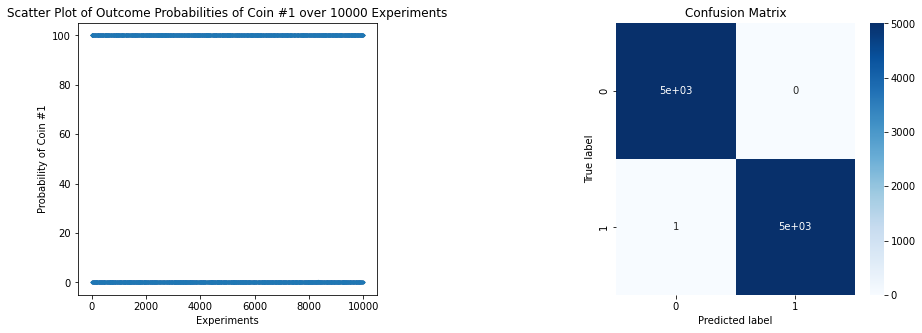

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5007
           2       1.00      1.00      1.00      4993

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
# Default Values, 10000 experiments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

probabilities = []
coin_true = []
coin_predicted = []
N_experiments = 10000

for _ in range(N_experiments):
  experiment = test_prob_coin_1()
  probabilities.append(experiment[3])
  coin_true.append(experiment[4])
  coin_predicted.append(experiment[5])


# Set figure size and create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Scatter Plot
axs[0].scatter(range(len(probabilities)), probabilities, s=5)
axs[0].set_title(f'Scatter Plot of Outcome Probabilities of Coin #1 over {N_experiments} Experiments')
axs[0].set_xlabel('Experiments')
axs[0].set_ylabel('Probability of Coin #1')

# Confusion Matrix
cm = confusion_matrix(coin_true, coin_predicted)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', cbar=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.subplots_adjust(wspace=0.8)

plt.show()

# Compute the classification report
report = classification_report(coin_true, coin_predicted)

print(report)


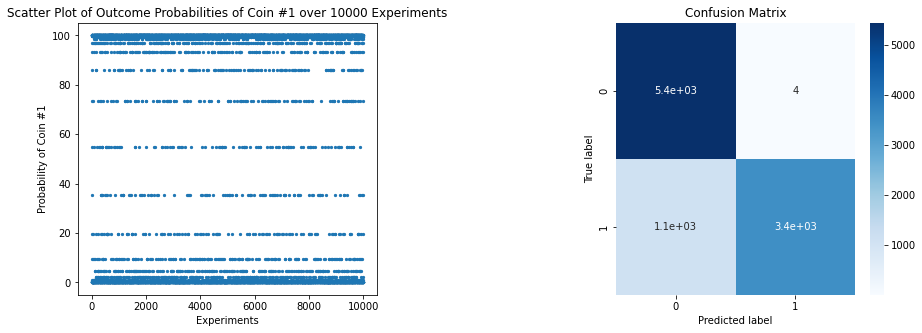

              precision    recall  f1-score   support

           1       0.83      1.00      0.91      5437
           2       1.00      0.76      0.86      4563

    accuracy                           0.89     10000
   macro avg       0.91      0.88      0.88     10000
weighted avg       0.91      0.89      0.89     10000



In [ ]:
# prior = 0.50, p1 =0.6, p2 = 0.4, 10000 experiments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

probabilities = []
coin_true = []
coin_predicted = []
N_experiments = 10000


for _ in range(N_experiments):
  experiment = test_prob_coin_1(prior = 0.55, p1=0.6,p2=0.4)
  probabilities.append(experiment[3])
  coin_true.append(experiment[4])
  coin_predicted.append(experiment[5])
  

# Set figure size and create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

## Scatter Plot
# Plot the outcome probabilities as a scatter plot
axs[0].scatter(range(len(probabilities)), probabilities, s=5)
axs[0].set_title(f'Scatter Plot of Outcome Probabilities of Coin #1 over {N_experiments} Experiments')
axs[0].set_xlabel('Experiments')
axs[0].set_ylabel('Probability of Coin #1')

# Confusion Matrix
cm = confusion_matrix(coin_true, coin_predicted)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', cbar=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.subplots_adjust(wspace=0.8)

plt.show()

# Compute the classification report
report = classification_report(coin_true, coin_predicted)

print(report)


## A Detailed Answer

Let $(\Omega, \mathcal A, \mathbb P)$ be a probability space together with the following three objects:

1.   A random variable $C: \Omega \to \{1,2\}$ with $C_*\mathbb P = p_c \delta_1 + (1-p_c) \delta_2$. 
  - This describes picking coin #1 with probability $p_c$ and coin #2 with probability $1-p_c$. In this case $p_c = 1/2$ as the coins are completely identical. Moreover, in this context $p_c$ is usually referred to as the prior probability.
2.   A sequence $(X_k^{(1)}: \Omega \to \{0,1\})_{k \in \mathbb N}$ of i.i.d. random variables with $(X_1^{(1)})_* \mathbb P = p_1 \delta_1+(1-p_1) \delta_0$.
  - This will be used to describe tossing coin #1 an arbitrary number of times, where the probability of heads is $p_1$ and the probability of tails is $1-p_1$. In this case $p_1 = 0.7$.
3.   A sequence $(X_k^{(2)}: \Omega \to \{0,1\})_{k \in \mathbb N}$ of i.i.d. random variables with $(X_1^{(2)})_* \mathbb P = p_2 \delta_1+(1-p_2) \delta_0$
  - This will be used to describe tossing coin #2 an arbitrary number of times, where the probability of heads is $p_2$ and the probability of tails is $1-p_2$. In this case $p_2 = 0.3$.

and the additional assumption, that

4. The random variable $C$ is pairwise independent of both processes $(X_k^{(1)})_{k \in \mathbb N}$ and $(X_k^{(2)})_{k \in \mathbb N}$.
 - This corresponds to the heuristics, that choosing one of the coins at random should not have any effect on the outcome of the tosses of the coin chosen. Moreover, in this case, the independence of $(X_k^{(1)})_{k \in \mathbb N}$ and $(X_k^{(2)})_{k \in \mathbb N}$ is irrelevant to this problem. Thus, we assume without loss of generality that these two process are likewise independent.

Where,
- $\delta_x$ denotes the Dirac delta distribution on $\mathbb R$ centered at $x \in \mathbb R$,
- For a random variable $Y: \Omega \to \mathbb R$, $Y_* \mathbb P$ denotes the push-forward of $\mathbb P$ under $Y$ (i.e. the induced distribution of $Y$). More precisely, $Y_*\mathbb P(B) = \mathbb P(Y^{-1}B)$ for any (measurable) set $B (\in \mathcal B(\mathbb R)$, where $\mathcal B(\mathbb R)$ denotes the Borel $\sigma$-algebra on $\mathbb R$).

Concretely, as this is usually omitted, the model probability space can be taken to be
\begin{align}
& \Omega = \{1,2\} \times \{0,1\}^{\mathbb N} \times \{0,1\}^{\mathbb N}, \\
& \mathcal A = 2^{\{1,2\}} \otimes \bigg(\bigotimes_{\mathbb N}2^{\{0,1\}}\bigg) \otimes \bigg(\bigotimes_{\mathbb N}2^{\{0,1\}}\bigg), \\ 
& \mathbb P = \big(p_c \delta_1 + (1-p_c)\delta_2\big ) \otimes \big( p_1 \delta_1+(1-p_1) \delta_0 \big) ^{\otimes \mathbb N} \otimes \big( p_2 \delta_1+(1-p_2) \delta_0 \big) ^{\otimes \mathbb N},
\end{align}
where $2^{\mathcal S}$ denotes the power set of a set $\mathcal S$ (in this case interpreted as a $\sigma$-algebra) and $\otimes$ denotes the natural product of $\sigma$-algebras with respect to the intrinsic projection maps. In particular, $C$ is the projection map from $\Omega$ onto $\{1,2\}$, $X_k^{i}$ is the projection map of $\Omega$ onto the $i$-th copy of $\{0,1\}^\mathbb N$ concatenated with the projection map of $\{0,1\}^{\mathbb N}$ onto its $k$-th component for $i = 1,2$. It is straightforward to see, that this construction models precisely conditions (1)-(4) outlined above.



Having introduced these objects, we construct a process $(S_N)_{N \in \mathbb N}$ defined by 
$$
S_N = \sum_{1 \leq k \leq N} X_k ^{(C)}
$$
or more precisely by
$$
S_N(\omega)= \sum_{1 \leq k \leq N} X_k ^{(C(\omega))}(\omega), \; \text{ for } \omega \in \Omega.
$$
For any fixed $N \in \mathbb N$, we interpret a realization of $S_N$ as the outcome (or number of heads) after picking one of the coins with respect to $p_c \delta_1 + (1-p_c)\delta_2$ and flipping it $N$ times.

Establishing this formalism is critical, as we need to relate all random variables on a fixed probability space. The question can now simply be restated in the following form: what is the posterior probability of $\{C =1 \}$ given $\{S_N = S\}$, where $S \in \{0, \dots, N\}$? Formally, we formulate this as
$$
\mathbb P(C = 1 \, | \, S_N = S) = \frac{\mathbb P(\{S_N = S \} \cap  \{C= 1\})}{\mathbb P(S_N = S)}, \, S \in \{0, \dots, N\}.
$$
The classical approach to this question is via Bayes' theorem (or basic conditional expectation). Accordingly, we have
$$
\mathbb P(C=1\,|\, S_N = S) = \frac{\mathbb P(S_N = S \, | \,  C= 1)\, \mathbb P(C=1)}{\mathbb P(S_N =S)}.
$$
We now proced to compute all the component encompassing the right-hand side of the former equation. Note first, that due to (1),
$$
\mathbb P(C= 1) = p_c.
$$
Next, observe that both (2) and (3) imply
$$
\mathbb P(S_N = S | C = i) = \mathbb P \bigg(\sum_{1 \leq k \leq N} X_k^{(i)} = S \bigg) = \binom{N}{S}p_i^S (1-p_i)^{N-S}, \; i \in \{1,2\},
$$
which in particular yields
$$
\mathbb P(S_N) = \sum_{i \in \{1,2\}} \mathbb P(S_N = S | C = i)\mathbb P(C = i) = \binom{N}{S}\bigg(p_1^S (1-p_1)^{N-S} p_c+p_2^S (1-p_2)^{N-S}(1-p_c)\bigg).
$$
We conclude that:
$$
\mathbb P (C = 1 \, | \, S_N = S) = \frac{p_1^S(1-p_1)^{N-S}p_c}{p_1^S (1-p_1)^{N-S} p_c+p_2^S (1-p_2)^{N-S}(1-p_c)} \\
= \frac{7^S 3^{N-S}}{7^S 3^{N-S}+3^S 7^{N-S}}.
$$
